# MNIST

This set of problems builds on 04-knn. We will use the knn function to classify images of handwritten digits. If you had trouble implementing KNN and would like working KNN code, please let me know! I will provide some. You will need to either copy and paste this code to the bottom of your KNN notebook or copy your KNN functions into the top of this notebook. Either way is fine.

## Problem 14

Now, let's load the `mnist` dataset. This is one of the most common datasets in machine learning research. It is a collection of 70,000 handwritten digits, "0" through "9". 60,000 of these are "training data" and 10,000 are "test data". We know the labels of the training data - we use it to traing a statistical model or, in our case, a KNN classifier. The test data are not shown to the algorithm. We use the test data to evaluate how well our algorithm can classify each image.

In a terminal, run the following:
```
conda install -c conda-forge mnist
```

Then, run the following code:
```
import matplotlib.pyplot as plt
import mnist

images_train = mnist.train_images()
images_train_labels = mnist.train_labels()
images_test = mnist.test_images()
images_test_labels = mnist.test_labels()
```

You can find more information about MNIST here: http://yann.lecun.com/exdb/mnist/. This website even includes a running list of the best algorithms and how well they perform! You'll see there's an entire category for k-NN algorithms. The error rate is 1-accuracy. We are implementing the algorithm described in the first two rows of the k-NN section.

In [154]:
import matplotlib.pyplot as plt
import mnist
images_train = mnist.train_images()
images_train_labels = mnist.train_labels()
images_test = mnist.test_images()
images_test_labels = mnist.test_labels()

## Problem 15

Let's visualize the first digit. First, confirm that our `images_train` array is a 3 dimensional tensor. It is a numpy array, so you can use the `.shape` attribute. 


In [155]:
images_train.shape

(60000, 28, 28)

If you did that correctly, you'll see that the array is 60,000 by 28 by 28 elements in size. Therefore, our first dimension (rows) is probably the images. So, to plot the first digit, run the following code:

```
plt.imshow(images_train[0,:,:])
```

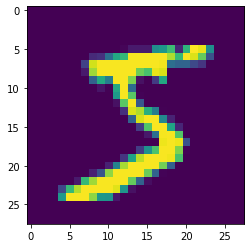

In [156]:
plt.imshow(images_train[0,:,:])

## Problem 16

Now, let's see what our labels look like. Go ahead and print the `images_train_labels` array. Does the first label match the image you just plotted?

## Problem 17

The MNIST data are not scaled properly. Right now the background of an image is 0 (black) and the foreground is 255 (white). Divide `images_test` and `images_train` by 255 and save the results back in `images_test` and `images_train`. 

In [157]:
images_test = images_test/255
images_train = images_train/255

## Problem 16

Now, you are all set to use your KNN classifier to classify these handwritten digits. Use your knn function and the following datasets to classify the first 200 images in the images_test dataset:

* `images_test[0:200,:,:]`
* `images_train
* `images_train_labels`

This may take several minutes because you are computing 200 x 60,000 distances. That's 12 million computations.

Save your results (predicted classes) in a new object called `test_predictions`. 


In [158]:
images_test = images_test[0:200,:,:]

In [159]:
import numpy as np
import logging

class RetrieveDistances(object):
    @staticmethod   
    def euclidean(x,y):
        """
        Inputput
            x: a 1-dimensional numpy array
            y: a 1-dimensional numpy array
        Output
            A single number, the euclidean distance between x and y
        """      

        return(np.sqrt(np.sum((x - y)**2)))
    
    @staticmethod
    def many_distances(x,Y):

        """
        Input
            x: a single point as a numpy array
            Y: a 2-dimensional numpy array
        Output
            a numpy array of euclidean distances
        """
        result = np.zeros(Y.shape[0])
        for idx in range(0, Y.shape[0]):            
            dist = RetrieveDistances.euclidean(x, Y[idx])          
            result[idx] = dist  
        return(result)
    
    @staticmethod
    def closest_indices(dists, n):

        """
        Input
            dists: a numpy array of distances (1 dimensional)
            n: the number of lowest values to find
        Output
            a numpy array with the indexes in dists where the
            n lowest values are located.
        """

        arrIndexes = np.argsort(dists)   
        return(arrIndexes[0:n])
    
    @staticmethod
    def get_values_by_index(indices, values):
        """
        Input
            indices: a numpy array of indices
            values: a list of values
        Output
            a list of elements from values whose indexes
            are the values in indices
        """
        arr = np.array(values)
        return(arr[indices])
    
    @staticmethod
    def get_mode(values):
        """
        Input
            values: a lists of values
        Output
            the most common value in the list.
            If there's a tie, break it any way you want to.
        """

        counts = np.unique(values, return_counts=True)
        cnt = np.argsort(counts[1])   
        colorIndex = cnt[len(cnt) -1]
        label = counts[0][colorIndex]   
        return(label)
    
    @staticmethod
    def knn(ind, test_pts, train_pts, labels, k):
        """
        Input
            test: A 2-D numpy array of points (rows) and features (cols)
            train: A 2-D numpy array of points (rows) and features (cols)
            labels: A list of labels associated with train points
        Output
            A list of best guesses for the test labels
        """      
        output = []    
        startIdx = ind[0]
        endIdx = ind[1]
        subsetOfPoints = test_pts[startIdx:endIdx]
       
        for i in range(0,subsetOfPoints.shape[0]):                     
            dists = RetrieveDistances.many_distances(subsetOfPoints[i],train_pts)              
            label_indices = RetrieveDistances.closest_indices(dists, k)           
            labelSet = RetrieveDistances.get_values_by_index(label_indices, labels)          
            predictedLabel = RetrieveDistances.get_mode(labelSet)
            output.append(predictedLabel)      
            
        
        return output
    
    @staticmethod    
    def multiclass_accuracy(truth,predictions):
        """
        Input
        truth: a list of true labels
        predictions: a list of predicted labels
        Output
        a single value - the multiclass accuracy
        """
        cmp = np.array(truth) == np.array(predictions)
        wrong = len(cmp[cmp == False])
        right = len(cmp[cmp == True])
        accuracy = right/(wrong + right)
        return(accuracy)

In [168]:
import concurrent.futures
import math

def testMethod(item):     
    result = RetrieveDistances.knn(item, images_test_set, images_train, images_train_labels, k)
    return result

def main(tupList, numProcesses):
    result = []
    with concurrent.futures.ProcessPoolExecutor(max_workers = numProcesses) as executor:
        for tupRange, label in zip(tupList, executor.map(testMethod, tupList)):
            for item in label:
                result.append(item)
    return result
            
def getInput(size, interval):    
    arr = []    
    iterations = int(size/interval)
    for i in range(0,iterations):
        start = i*interval
        end = start + interval        
        arr.append((start, end))       
    return arr


if __name__ == '__main__':
    k = 1
    testSize = 200
    numProcesses = 4   
    interval = 2  
    images_test_set = images_test[:testSize]
    maxNum = images_test_set.shape[0]    
   
   
    tupList = getInput(maxNum, interval) 
    start_time = datetime.now()
    
    predictedLabels = main(tupList, numProcesses)
    print(predictedLabels)  
    
    end_time = datetime.now()
    diff = end_time - start_time
    print("Test Image Set Size: ", maxNum)
    print("Number of Processes:", numProcesses)
    print("Start Time =", start_time.strftime('%H:%M:%S.%f'), "\nEnd Time =", end_time.strftime('%H:%M:%S.%f'), "\nTotal Run Time (Seconds) =", diff.total_seconds())


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 5, 1, 6, 4, 2]
Test Image Set Size:  200
Number of Processes: 4
Start Time = 08:03:29.310493 
End Time = 08:04:38.519541 
Total Run Time (Seconds) = 69.209048


## Problem 17

Compute your classifier's accuracy. Remember to compare your output `test_predictions` against only the first 200 elements of `images_test_labels`. Multiclass accuracy is just the proportion of cases that are correctly predicted. In other words, it is the average of the vector that is `[0,1,0,1,1,1,...]` where 0 represent "not equal to the true label" and 1 represents "equal to the true label."

In [167]:
accuracy = RetrieveDistances.multiclass_accuracy(images_test_labels[:testSize], predictedLabels)
print("Classifier Accuracy (k = 1):",'{:.1%}'.format(accuracy))

Classifier Accuracy (k = 1): 99.0%
